# Deep Classroom
I am happy to have you. In the following, you will interactively experience and explore the world of artificial intelligence, machine learning, or, even more specifically, deep learning. You will get to know...
- the general design of a deep learning pipeline
- the basic principles behind deep learning 
- the fundamental neural network architecture
- the process of training a neural network
- the deployment of your trained neural network
- the validation of your model

After this course, you will know the basics of...
- the look and feel of the programming language python
- the deep learning packages tensorflow and Keras
- the intuitions and approaches within deep learning


## Getting comfortable in the driver's seat!

The interface you are seeing in front of you is called jupyter notebook, an excellent interactive way to present and communicate code. Think of it as your cockpit. The nice thing is that in the back, we already got your engine preheated and ready to rumble, waiting for you to kick the pedal to the metal. Thanks to [binder](https://mybinder.org/) you can execute the code, on your machine using binders compute power.  

In principle, this notebook is structured in cells, which get highlighted once you select them. There are two types of cells. The markdown cells (such as this one) are for everything that is not code. Here you will find explanations, descriptions, figures, and many more. The other type of cell is for code. Here you can interactively change code and run it within your browser. 

Navigate to the next cell by using the down-arrow or click on the next cell...



In [1]:

# Great job. This is an interactive python cell with an easy print function. Feel free to change and play around with it.

print('Ready Player One!')

# A hashtag is used to comment on stuff that is not executed as code. This is useful if you want to add an explanation or further relevant information to your code.
# Run a cell by clicking the Run button above, or by Ctrl + Enter (Strg + Enter) 

# Notice the output below the cell.


Ready Player One!


In [1]:

# We will use this cell to import all the packages you will need in the following - think of it as turning on all your systems
# in your cockpit

# This makes sure that if you change code in your external scripts, they will be updated

import checker
import generator
import training_module
import os

import math
import torchmetrics
import matplotlib.pyplot as plt
import seaborn as sn
from torchsummary import summary
from torch.utils.data import DataLoader,TensorDataset
from pytorch_lightning.callbacks import ModelCheckpoint


import importlib
importlib.reload(checker)
importlib.reload(generator)
importlib.reload(training_module)

# now go ahead and Run the cell. This might take a while...
# while the cell is running, you will see ln[*] next to it. Once it finished, you will see the number of execution
# In case you want to interrupt the run of a cell, press Ctrl + C (Strg + C) 


<module 'training_module' from '/Users/kg2371/Projects/DeepDive/training_module.py'>

##### Hint: 
Below code cells you sometimes find, what we call hints. So in case you get stuck, or are in search of additional information this is the place for additional elaboration on the topic or links. <br>
- [print()](https://docs.python.org/3/library/functions.html#print) <br>
- [import](https://docs.python.org/3/reference/simple_stmts.html#import)

##### Side Quest:
Another feature is the side quests. These are things you could try, think about, and tease your brain with. They are not necessary for you to learn the fundamentals. They are nevertheless, valuable for your holistic understanding of the subject. Also, they are fun.


### Making sure you are still on track

Next, welcome to the world of what we call sanity checks.
Every now and then, you will find sanity checks below your interactive code cells. 
These are to make sure that your code does what it should (this is usually called a [unit test](https://en.wikipedia.org/wiki/Unit_testing)).
Once your code passed the unit test, it is safe for you to go ahead with the notebook.
So do not touch the code within a sanity check cell. Instead, just run it and fix your code in the respective cell.



In [2]:

# Write a function that adds a to b and returns c
# the code goes here comment has to be removed and indicates that you need to pick your brain and write some code.
def add(a,b):
    c = a+b
    return c


##### Hint: 
An addition in python can be done by simply writing a '+' sign connecting the two input arguments. An alternative is to use a dedicated function that takes an array of values. <br>
- [sum([a, b])](https://docs.python.org/3/library/functions.html#sum) <br>


In [3]:

# After writing the add function in the cell above, go ahead and run this cell.

'''
 ____   __   __ _  __  ____  _  _     ___  _  _  ____  ___  __ _ 
/ ___) / _\ (  ( \(  )(_  _)( \/ )   / __)/ )( \(  __)/ __)(  / )
\___ \/    \/    / )(   )(   )  /   ( (__ ) __ ( ) _)( (__  )  ( 
(____/\_/\_/\_)__)(__) (__) (__/     \___)\_)(_/(____)\___)(__\_)

Do not touch, just run!
'''
checker.test_add(add)


# If your code is working correctly, you will be prompted with the message "Everything passed, 
# you are ready to go."
# This means you can continue with the next cell

# If there is a bug in your code, you will be prompted with an AssertionError, 
# outlining how your code failed.

# Go ahead, break your code and see what's happening to get a feeling for the sanity checks. 
# Then feel free to move on.

Everything passed, you are ready to go.


Now that you know how to drive this thing, you are ready for some real action.

## Talking about brains

Your brain is the most astonishing multi-purpose computer around. And neuroscientists and engineers alike have been trying to understand the mechanics of brains, to apply their findings to other fields, such as computer science. This is how the idea of artificial neural networks came into being. <br>

Your brain comprises approximately 80 billion neurons, or brain cells, which are heavily interconnected with what are called synapses. Neurons communicate with each other by sending electrical impulses through these synapses. If a neuron receives enough of these messages, the neuron itself sends an impulse to the neurons it is connected with. In this way, the brain can process complex data, extract features, and recognize a pattern. <br>

And this is not yet, the most exciting ability of the brain. Your brain is further able to learn, adjusting to newly perceived data, patterns, and behavior. This happens by either strengthening or weakening the connection or synapses between neurons, influencing their interplay. <br>


In the following, we will build something that is very similar to a very very simple version of a brain.

For this we will use:
- .. [PyTorch](https://pytorch.org/) 
- .. [Lightning](https://lightning.ai/)

while clambering on the "Hello World!" of deep learning, the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset.

In [4]:
# This line imports PyTorch
import torch    
# And this one Lightning
import pytorch_lightning as pl
# There is this joke that once you have added this import line to your code, 
# you are allowed to sell your product telling everyone that you are using AI. Life is easy, sometimes.

## Exploring the MNIST dataset

Before any data science or machine learning project, it is essential to get to know your data. This will enable you to detect issues, noise, pitfalls and understand what your model will learn at the end of the day. With the MNIST dataset, you will be working with a beautiful, cleaned, easy to understand, low-memory, large-scale dataset. 
Full disclaimer, MNIST is excellent for learning and research purposes, yet this is not what you can expect in real-life. 

MNIST is so commonly used that the PyTorch packages got our back with loading the data in one line. We are loading pairs of samples and ground truth annotations for both the training set (for training our model) and the test set (for testing our model). 

In [5]:
import torchvision.datasets as datasets
# And thats how easy we import the most popular deep learning datasets

In [6]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [7]:
# Lets see what this variable contains.

print(mnist_trainset)
print('--------------------------------------------------------------------')
print(mnist_trainset[0])
print('--------------------------------------------------------------------')
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
--------------------------------------------------------------------
(<PIL.Image.Image image mode=L size=28x28 at 0x1087CC040>, 5)
--------------------------------------------------------------------
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test


We can see that we have $60k$ datapoints in the training split, so $60k$ images, and that we can index the variable (``[0]``). The first entry of the training split contains an image of size $28x28$ (``PIL.Image.Image image mode=L size=28x28``) and the integer ``5``. The test split contains $10k$ images.

In [8]:
# lets extract the actual datapoints and annotations so that we can explore them
x_train = mnist_trainset.data.numpy()
y_train = mnist_trainset.targets.numpy()
x_test = mnist_testset.data.numpy()
y_test = mnist_testset.targets.numpy()


 Plot of the first 25 samples in the MNIST training set


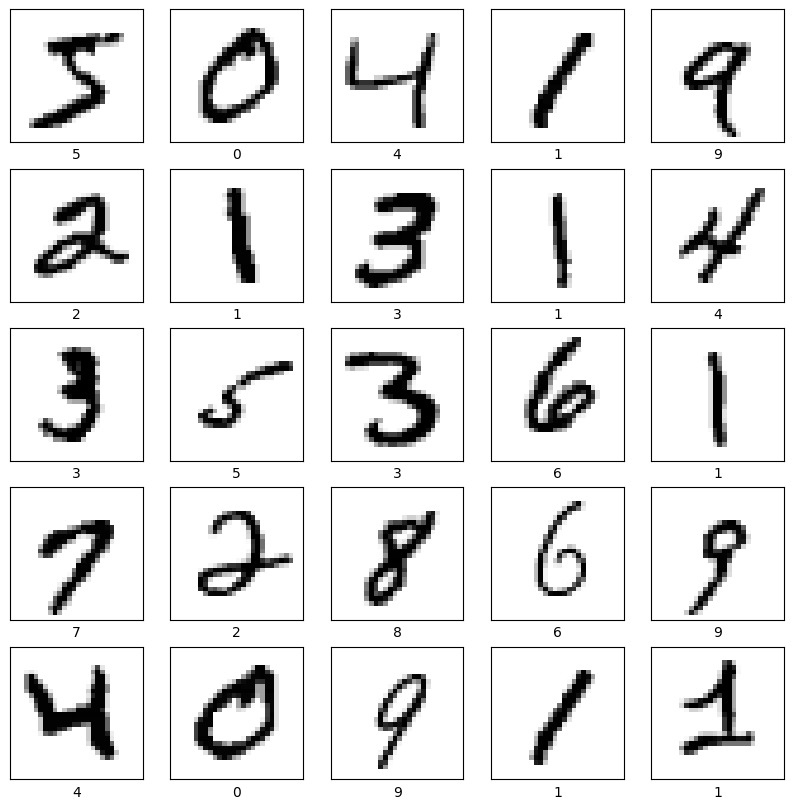

In [9]:
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

The shape of the data arrays already gave away that we are using way more samples (60k) for training than for testing (10k). A typical ratio is 80% training and 20% testing as a rule of thumb. Actually, the 80% training is further split into the real training and a validation set, but that will not bother us here. 

As we plot the first 25 samples of the MNIST training set together with their ground truth labels (annotations) we can start to guess what the dataset is all about - it is a dataset purposed for digit recognition.


### Data preprocessing
We already talked quite a bit about [activation functions](https://cs231n.github.io/neural-networks-1/) (or non-linearity) and how they take a single, usually accumulated, number and perform a specific fixed mathematical operation on it. There are quite different ones, but you will soon find out that there emerges a shared pattern within deep neural networks that makes them beneficial in practice.

- They mostly map any incoming value so that they are asymptotically bounded from above and below. For example, the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) does map to a range of values between $0$ and $1$.
They are usually most sensitive around zero because they tend to saturate to the bounds of the mapping for large numbers.

Thus we can speed up the training process by preprocessing our data so that the first layer's activation function has an easier time picking up the pattern.

For the MNIST, this is quickly done by normalizing the grayscale values $[0, 255]$ to a range between $[0, 1]$. Remember to do the preprocessing for both the training and the test samples.

In [10]:
x_train_normalized = x_train  / 255.
x_test_normalized = x_test / 255.


##### Hint: 
In python a division can be done like this in python:  $3, 5~/~ 2 == 2.5$ <br>

In [11]:
'''
 ____   __   __ _  __  ____  _  _     ___  _  _  ____  ___  __ _ 
/ ___) / _\ (  ( \(  )(_  _)( \/ )   / __)/ )( \(  __)/ __)(  / )
\___ \/    \/    / )(   )(   )  /   ( (__ ) __ ( ) _)( (__  )  ( 
(____/\_/\_/\_)__)(__) (__) (__/     \___)\_)(_/(____)\___)(__\_)

Do not touch, just run!
'''
checker.test_normalize(x_train, x_train_normalized)
checker.test_normalize(x_test, x_test_normalized)

Normalization worked out well, you are ready to go.
Normalization worked out well, you are ready to go.


In [12]:
# in the next step, we also need to reshape our input to fit our input layer later on. 
# This is due to pytorch expecting a definition for how many channels your input sample has, as we 
# deal with gray scale this is 1.
x_train_normalized= x_train_normalized.reshape(-1, 28, 28, 1)
x_test_normalized = x_test_normalized.reshape(-1, 28, 28, 1)

# To work with PyTorch we also need to convert our numpy arrays to tensors.
x_train_normalized = torch.from_numpy(x_train_normalized).float()
x_test_normalized = torch.from_numpy(x_test_normalized).float()
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

## Designing the neural network architecture

Remember how much work it was to set up a single neuron - right. Now enjoy how PyTorch is helping you with this. We will call our neural network [marvin](https://en.wikipedia.org/wiki/Marvin_the_Paranoid_Android). Feel free to change it to whatever you like, in case you are not okay with it.

Our model will follow some design requirements, it will be [sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) or it other words, feed forward, meaning that once a value passed through a unit, the unit will not see a value during that forward pass again. Or in other words, we do not have any recurrence in the architecture (feedback loops and so on). 

That's a lot to tackle, there will be quite some hyperparameters. This is for the visual learner - need a sandbox before we get started? I got your back [tensorflow sandbox](http://playground.tensorflow.org).

I really encourage you to take the time to play in the sandbox. It's worth to build up some intuition. At least play with the number of layers and the number of units per layer. Observe how the features increase in complexity the deeper you go with your layers.


In [57]:
# This is the moment where you define your model's architecture
marvin = torch.nn.Sequential(
  torch.nn.Flatten(),
  torch.nn.Linear(in_features=784,out_features=256),
  torch.nn.ReLU(),
  torch.nn.Dropout(0.2),
  torch.nn.Linear(in_features=256,out_features=10),
  torch.nn.Sigmoid()
)

Adding layers to Marvin is as easy as adding a layer while handing over that layer's specification. In the end, the layers will be stacked following the order in which your code gets compiled.

Initially, we need an input layer, which can take in our input samples. We want to build a Neural Network which consists of fully connected layers. Such layers can't cope with three-dimensional image inputs, they want a single, one-dimensional vector! So we need to flatten our images. This is done with the [Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer. Once we have that set-up, we feed our images through one [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) (or fully-connected) layer.
Now, print out your model's summary.

In [35]:
summary(marvin,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
           Dropout-4                  [-1, 256]               0
            Linear-5                   [-1, 10]           2,570
           Sigmoid-6                   [-1, 10]               0
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.78
Estimated Total Size (MB): 0.79
----------------------------------------------------------------



##### Hint: 
Find out about activation functions [here](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) and about layers [here](https://pytorch.org/docs/stable/nn.html#linear-layers). For each Linear layer you need to define how many input features you want, and how many output features should be produced. For the first Linear layer the input features are the pixel values of the flatten images, so $28x28=784$. 

<br>    

But wait! There is something missing. Keep on designing your model until your model summary is the same as this one:

```
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
           Softmax-3                   [-1, 10]               0
================================================================
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
```

Try thinking about _why_ you chose which layer to create your model? What are we trying to predict? Using softmax in your output layer will give you the pleasant effect of a probability distribution for your prediction. The output of softmax transformation has all values non-negative and sum to 1.

##### Side Quest: 
Come back once you finished training your model and try adding layers to get a better score. Maybe add another Linear layer before the Softmax? But keep in mind that you should add a activation function ([ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)?) after a intermediate layer. Adding [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout) layer to get some fancy regularization will most certainly also help. 

In [15]:
'''
 ____   __   __ _  __  ____  _  _     ___  _  _  ____  ___  __ _ 
/ ___) / _\ (  ( \(  )(_  _)( \/ )   / __)/ )( \(  __)/ __)(  / )
\___ \/    \/    / )(   )(   )  /   ( (__ ) __ ( ) _)( (__  )  ( 
(____/\_/\_/\_)__)(__) (__) (__/     \___)\_)(_/(____)\___)(__\_)

Do not touch, just run!
'''
checker.test_neural_network(marvin)

Neural network looks good, you are ready to go.


## Designing the neural network training

Great, that's it. Take a moment to realize how quickly and with how much ease (maybe not during the first time) you designed this architecture.

Next, we need to train Marvin to assign a class prediction when we hand him over a sample of a digit. 

In [17]:

# Define your loss
loss_fn = torch.nn.CrossEntropyLoss()

print(-math.log(1/10))

sampleID = 100
loss_fn(marvin(x_train_normalized[sampleID-1:sampleID]),y_train[:1])

2.3025850929940455


tensor(2.2539, grad_fn=<NllLossBackward0>)

The loss is crucial for your training. The better your loss reflects the actual objective of your model the more efficient it will converge to the optimal parameter set. 

The loss is also great to check whether your model behaves as expected. The SparseCategoricalCrossentropy is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

Your untrained model gives probabilities close to random (1/10 for each class,  as there are 10 digits), so the initial loss should be close to:

-tf.math.log(1/10) ~= 2.3

Obviously different samples will give different losses, play with the sampleID to observe the changes.

In [58]:
# We only use the first 100 samples of the train dataset ([:1000] and the first 500 of the test dataset ([:500]) to accelerate training since binder is quite slow.
# Maybe using more samples can increase your performance?
train_dataset = TensorDataset(x_train_normalized, y_train)
train_dl = DataLoader(train_dataset, batch_size=32,shuffle=True)

test_dataset = TensorDataset(x_test_normalized, y_test)
test_dl = DataLoader(test_dataset, batch_size=32,shuffle=False)


Now lets define the metric to use. In our case we will use the accuracy, which is the fraction of predictions our model got right.
##### Hint: 
Make sure you understand the difference between a metric (only tells you how good your neural network performs) and a loss (tells you how your model performance, but also directly tells your model how to update its weights to improve performance). <br>

In [59]:
def accuracy(y_pred,y_true):
    y_pred_argmax = torch.argmax(y_pred,dim=1)
    accuracy = torch.sum(y_pred_argmax == y_true)
    accuracy = accuracy /len(y_true)
    return accuracy

In [60]:
'''
 ____   __   __ _  __  ____  _  _     ___  _  _  ____  ___  __ _ 
/ ___) / _\ (  ( \(  )(_  _)( \/ )   / __)/ )( \(  __)/ __)(  / )
\___ \/    \/    / )(   )(   )  /   ( (__ ) __ ( ) _)( (__  )  ( 
(____/\_/\_/\_)__)(__) (__) (__/     \___)\_)(_/(____)\___)(__\_)

Do not touch, just run!
'''
checker.test_accuracy(accuracy)

your metric looks good, you are ready to go.


And now we define our training module in which we tell PyTorch which model, loss function, and metric to use...

In [61]:
training_mod = training_module.TrainingModule(
    model=marvin,
    loss=loss_fn,
    metric=accuracy
)

## Train the model

Now it is time to plug our data into Marvin and let him learn to recognize the digit within an image sample. Besides plugging in the data, and the labels, we need to define how long we want to train Marvin. In deep learning, training on each sample of the training set precisely ones is called an epoch.
Obviously, the longer you train, the better your model will fit the underlying pattern. Then you can also set how many samples Marvin will see during each update step (this is called batch size). The more samples, the better the gradient approximation, but at some point, you will also run into hardware limitations.

Yet, remember that it is the unseen data of your validation set that machine learning approaches are after. This is also what lets deep learning stand out from pure optimization.

In [65]:
# With this variable, we save the progress of our model. Just keep it as it is.
checkpoint_callback = ModelCheckpoint(
    dirpath=os.getcwd(),
    filename='marvin',
    save_top_k=1,
    verbose=True,
    monitor='validation_metric',
    mode='max',
    enable_version_counter=False
)

trainer = pl.Trainer(
    max_epochs=20, # Maybe training longer will yield better results?
    callbacks=checkpoint_callback
)

# And with that we start the training. Its that simple!
trainer.fit(
    model=training_mod, 
    train_dataloaders=train_dl,
    val_dataloaders=test_dl
)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type             | Params
-------------------------------------------
0 | model | Sequential       | 203 K 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
203 K     Trainable params
0         Non-trainable params
203 K     Total params
0.814     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 1875/1875 [00:08<00:00, 208.86it/s, v_num=12, validation_metric=0.965]

Epoch 0, global step 1875: 'validation_metric' reached 0.96540 (best 0.96540), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 1: 100%|██████████| 1875/1875 [00:08<00:00, 212.23it/s, v_num=12, validation_metric=0.969]

Epoch 1, global step 3750: 'validation_metric' reached 0.96890 (best 0.96890), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 2: 100%|██████████| 1875/1875 [00:08<00:00, 211.66it/s, v_num=12, validation_metric=0.972]

Epoch 2, global step 5625: 'validation_metric' reached 0.97180 (best 0.97180), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 3: 100%|██████████| 1875/1875 [00:09<00:00, 202.52it/s, v_num=12, validation_metric=0.973]

Epoch 3, global step 7500: 'validation_metric' reached 0.97330 (best 0.97330), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 4: 100%|██████████| 1875/1875 [00:09<00:00, 201.54it/s, v_num=12, validation_metric=0.974]

Epoch 4, global step 9375: 'validation_metric' reached 0.97430 (best 0.97430), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 5: 100%|██████████| 1875/1875 [00:08<00:00, 208.56it/s, v_num=12, validation_metric=0.974]

Epoch 5, global step 11250: 'validation_metric' was not in top 1


Epoch 6: 100%|██████████| 1875/1875 [00:08<00:00, 212.06it/s, v_num=12, validation_metric=0.979]

Epoch 6, global step 13125: 'validation_metric' reached 0.97860 (best 0.97860), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 7: 100%|██████████| 1875/1875 [00:08<00:00, 211.55it/s, v_num=12, validation_metric=0.979]

Epoch 7, global step 15000: 'validation_metric' reached 0.97920 (best 0.97920), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 8: 100%|██████████| 1875/1875 [00:08<00:00, 212.07it/s, v_num=12, validation_metric=0.977]

Epoch 8, global step 16875: 'validation_metric' was not in top 1


Epoch 9: 100%|██████████| 1875/1875 [00:08<00:00, 213.43it/s, v_num=12, validation_metric=0.979]

Epoch 9, global step 18750: 'validation_metric' was not in top 1


Epoch 10: 100%|██████████| 1875/1875 [00:08<00:00, 213.22it/s, v_num=12, validation_metric=0.980]

Epoch 10, global step 20625: 'validation_metric' reached 0.97960 (best 0.97960), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 11: 100%|██████████| 1875/1875 [00:08<00:00, 212.96it/s, v_num=12, validation_metric=0.979]

Epoch 11, global step 22500: 'validation_metric' was not in top 1


Epoch 12: 100%|██████████| 1875/1875 [00:08<00:00, 210.18it/s, v_num=12, validation_metric=0.979]

Epoch 12, global step 24375: 'validation_metric' was not in top 1


Epoch 13: 100%|██████████| 1875/1875 [00:09<00:00, 202.68it/s, v_num=12, validation_metric=0.979]

Epoch 13, global step 26250: 'validation_metric' was not in top 1


Epoch 14: 100%|██████████| 1875/1875 [00:09<00:00, 207.57it/s, v_num=12, validation_metric=0.979]

Epoch 14, global step 28125: 'validation_metric' was not in top 1


Epoch 15: 100%|██████████| 1875/1875 [00:08<00:00, 208.99it/s, v_num=12, validation_metric=0.980]

Epoch 15, global step 30000: 'validation_metric' reached 0.97980 (best 0.97980), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 16: 100%|██████████| 1875/1875 [00:08<00:00, 210.56it/s, v_num=12, validation_metric=0.979]

Epoch 16, global step 31875: 'validation_metric' was not in top 1


Epoch 17: 100%|██████████| 1875/1875 [00:08<00:00, 210.25it/s, v_num=12, validation_metric=0.979]

Epoch 17, global step 33750: 'validation_metric' was not in top 1


Epoch 18: 100%|██████████| 1875/1875 [00:08<00:00, 210.37it/s, v_num=12, validation_metric=0.981]

Epoch 18, global step 35625: 'validation_metric' reached 0.98090 (best 0.98090), saving model to '/Users/kg2371/Projects/DeepDive/marvin.ckpt' as top 1


Epoch 19: 100%|██████████| 1875/1875 [00:08<00:00, 209.77it/s, v_num=12, validation_metric=0.979]

Epoch 19, global step 37500: 'validation_metric' was not in top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 1875/1875 [00:08<00:00, 209.74it/s, v_num=12, validation_metric=0.979]


##### Side Quest:
Reach at least a validation performance of $98 \%$ or higher before moving on. To achieve this, you are free to change whatever you want within the architecture and training process. Obviously, better performance is an excellent achievement.

Tweak your model to get a better performance. To achieve this, you are free to change whatever you want within the architecture and training process. Obviously, better performance is an excellent achievement. You can always submit your current best score to the leaderboard by executing the cell below. Specify your name and a password and your score will pop up on: [the leaderboard!](http://194.164.52.117/). Who will get the best score?

In [66]:
import checker
importlib.reload(checker)

checker.submit_score(
    username= 'Luca',
    password= 'Pw',
    model=marvin,
    checkpoint_path="marvin.ckpt")

200
{'message': 'Player score updated successfully'}



## Evaluating Marvin

Yes, you are right. The job is basically done. Would you say that you know what Marvin learned or what exactly he is capable of in the end? I do not want to spoil it for you, but in real life the hard task begins right after training a model - propper validation is key. Especially in safety critical systems. And there are enough [incidents](https://incidentdatabase.ai/) to demonstrate how models can fail and why it is so hard to prevent these failures.

#### Side Quest:
Try to answer the following questions:

- Which digit is hardest for Marvin to predict correctly?
- Which two digits does Marvin confuse most often?
- Which digit does he perform best in?
- How do digits look that Marvin was not able to predict correctly? Can you see why?

These questions are hard to answer and clarify that an in depth analysis of the model's performance is paramount. I like a mix of visualization (which helps my intuition) and number crushing (which helps to write reports and prove my intuition with hard and cold numbers).

So in the following, we will go ahead and answer some of the questions mentioned above. Along the way, you will learn some strategies to evaluate your neural network.

The worse your model is the easier it will be to pick up effects in your validation, so feel free to either save a random model or a model that has only been trained for a few iterations and use this model in the following.

### The Intuitive Approach

We will start with the intuition building approach. The following code will plot the image samples. The caption below is Marvin's prediction. If he is right, the sample will get a greenish touch. If he is wrong, a reddish one. Try to answer the above questions with the results from the intuitive plot you will generate below.

In [67]:

# load a saved marvin configuration you want to evaluate
# model_name = # '''your model name goes here''' 
# marvin_reloaded = tf.keras.models.load_model(model_name)

checkpoint = "marvin.ckpt"
trained_model = training_module.TrainingModule.load_from_checkpoint(
    checkpoint,
    model=marvin,
    loss=loss_fn,
    metric=accuracy
)
# Put our model into evaluation mode
trained_model.eval()
model = trained_model.model
model.cpu()

# Let Marvin predict on the test set, so we have some data to evaluate his performance.
predictions = model(x_test_normalized)

# Remember that the prediction of Marvin is a probability distribution over all ten-digit classes
# We want him to assign the digit class with the highest probability to the sample.
predictions = torch.argmax(predictions, axis=1)

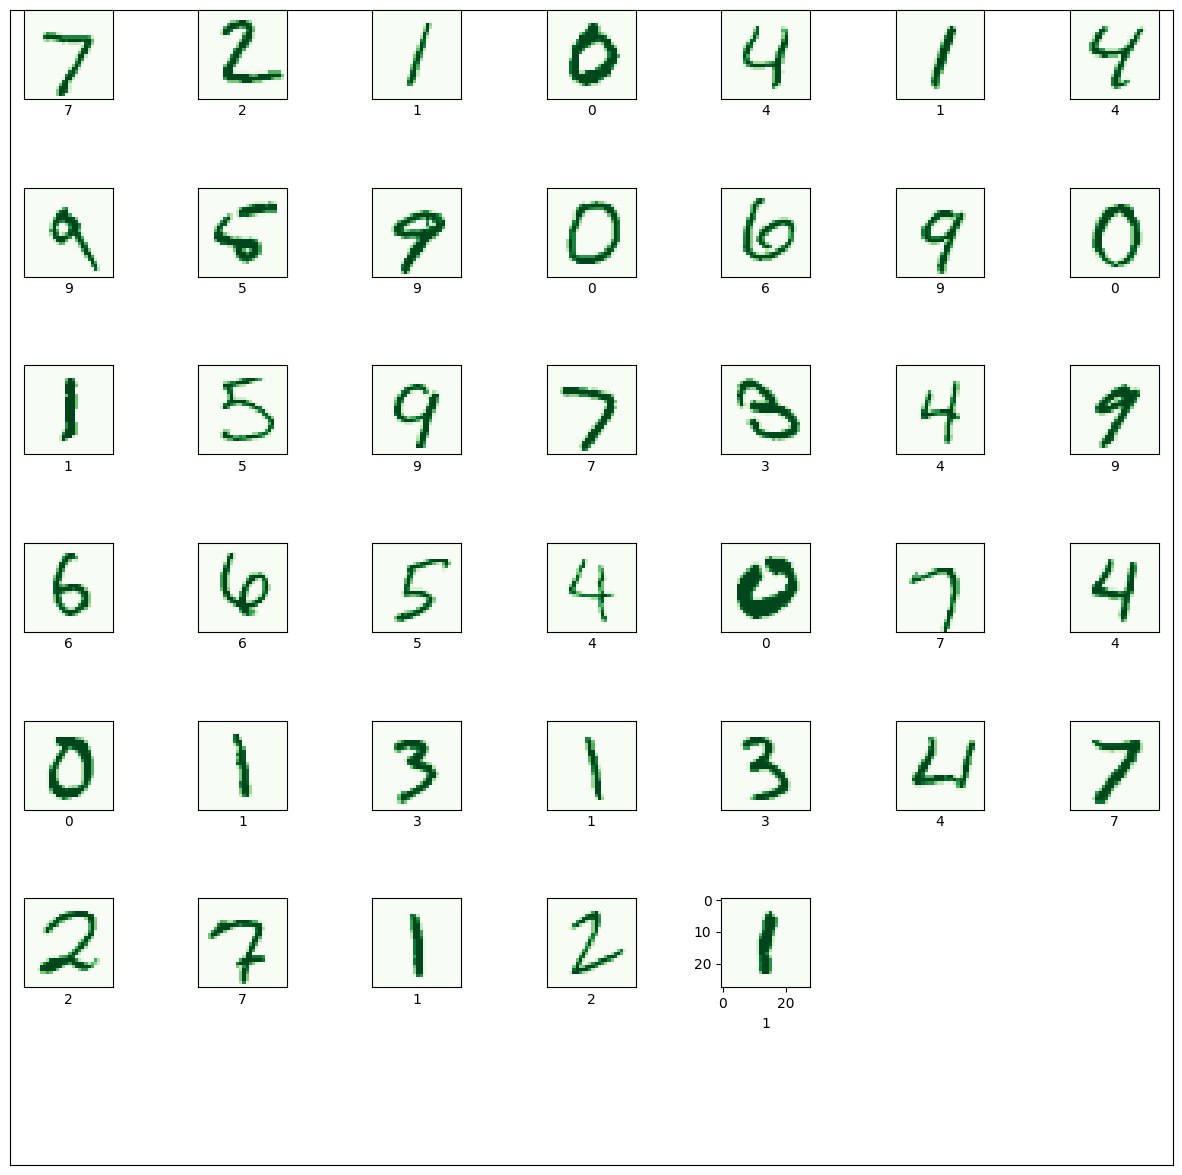

In [68]:
# Plot for the intuitive approach
numbers_to_display = 40
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(int(predicted_label))

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Okay, but now only look at the wrong predictions since they are the ones we are really interested in.

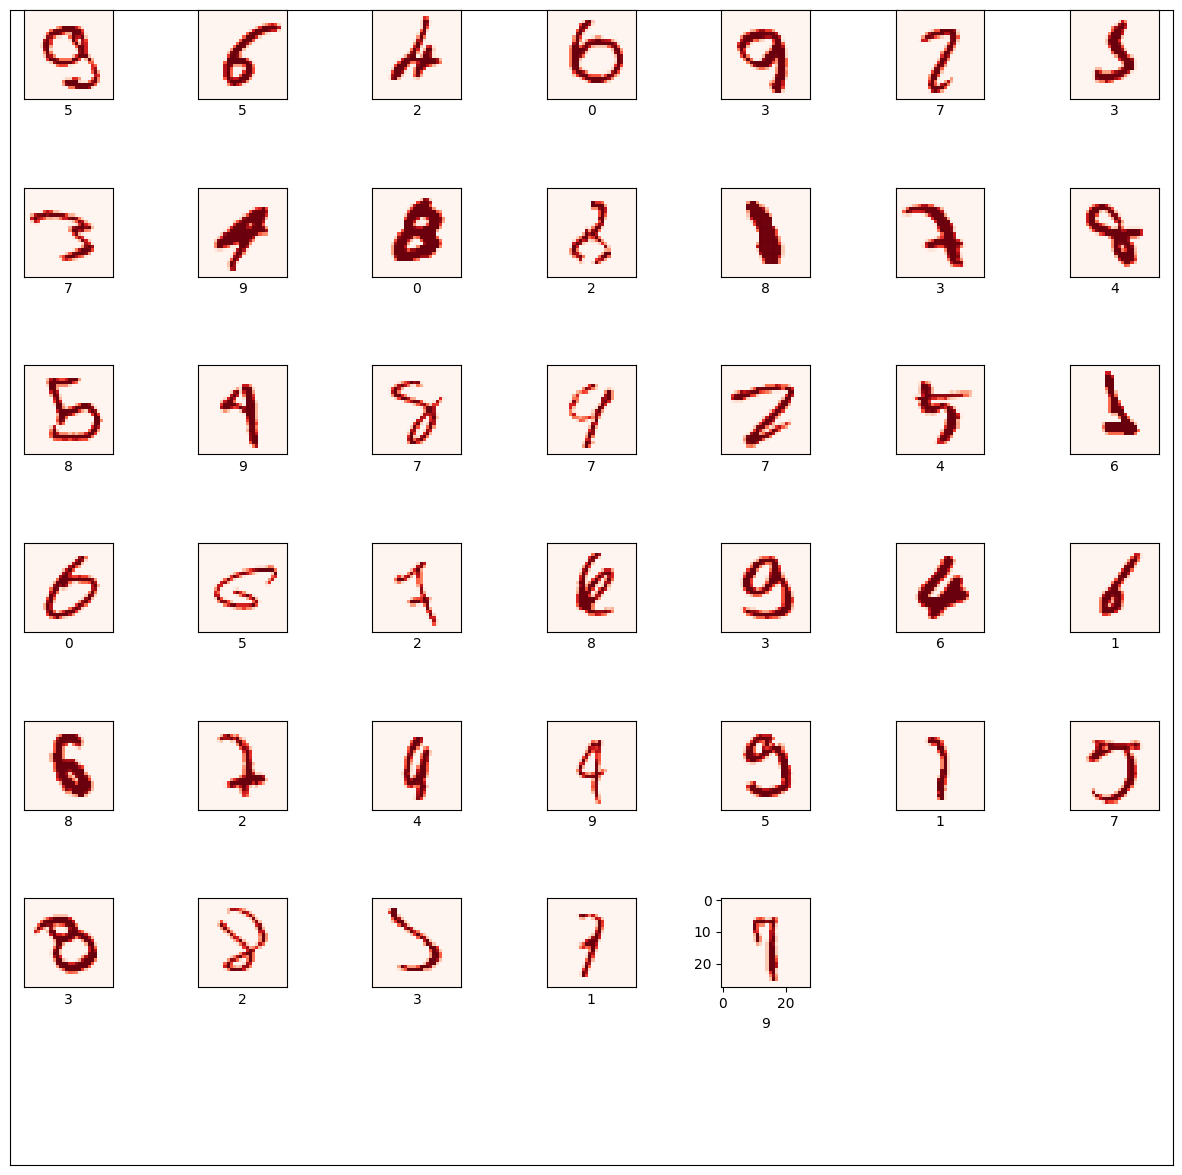

In [69]:
# Only display wrong predictions
numbers_to_display = 40
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
num_of_plotted_numbers = 0
for plot_index in range(len(predictions)):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # what condition needs to be true to only show the number if the prediction is wrong?
    if predicted_label != y_test[plot_index]:
        plt.subplot(num_cells, num_cells, num_of_plotted_numbers + 1)
        plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap='Reds')
        plt.xlabel(int(predicted_label))
        num_of_plotted_numbers+=1
    if num_of_plotted_numbers >= numbers_to_display:
        break

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()



### The Empirical Number Crushing Approach

Now that you intuitively answered the questions, let's do some data analysis on the results and see how much you were off and where you were right and picked up patterns in Marvin's capabilities. 

#### Hint: 
Usually, visualizations to building your intuition are most beneficial during your first training runs on problems you do not know what to expect from your neural network. In visualizations, you might also be able to pick up wrong label assignments (think somebody labeled all "8"s as "9"s), ambiguous or overlapping classes (think somebody labeled all "6"s and "9"s as the same class). These things do not usually happen in beautifully cleaned datasets such as MNIST. But I promise you, you will be surprised how messy these public datasets out there are. And further, I promise you that if you are building your own datasets, these bugs will be there too and want to be found.

Now for the analytical approach, we will look at one of the most basic strategies, the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) or error matrix. This table shows the actual class of the sample (horizontal), plotted over which class it was predicted (vertical). To make things clearer, numbers in the diagonal are true positives, meaning Marvin predicted them correctly. 

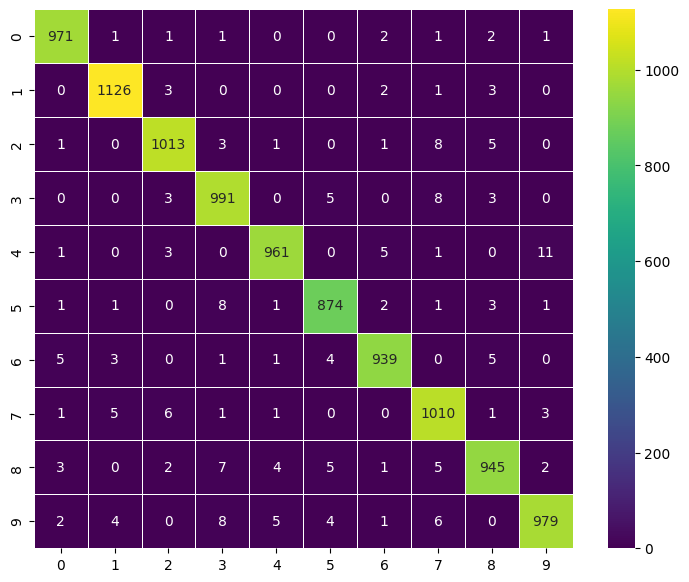

In [70]:
confusion_matrix = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=10)
conf_mat = confusion_matrix(predictions,y_test)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    conf_mat,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()

### Time to say Goodbye
Well, actually not quite yet. Now, you are capable of training neural networks, you learned about the fundamentals, and you also can evaluate your model's performance professionally. Next, I want to point out some things you can look into along your path to become a machine learning engineer or deep learning researcher.

#### In this notebook
You can definitely come back to this notebook again and again. Play with the hyperparameters, try to follow through the notebook with other datasets. There are quite a few [directly supported](https://pytorch.org/vision/stable/datasets.html) by PyTorch, so they can easily plug into this notebook. Or try to load a dataset from your directory and write your own data pipeline.

Come back and try working with other layers, such as Dropout or Batchnorm. Get to know regularization strategies, such as augmentation, and try to implement them here as well. Think of this notebook as your bridgehead to the world of deep learning. This is the place to break things and try stuff.

#### Literature
Reading helps to get to know new approaches, different ideas, and dive deeper and build up your knowledge. I recommend the following books to start with. From there, start to go with the actual papers.

[To start with](http://www.deeplearningbook.org/) Deep Learning Book - Ian Goodfellow and Yoshua Bengio and Aaron Courville
Abstract: The Deep Learning textbook is a resource intended to help students and practitioners enter the field of machine learning in general and deep learning in particular. The online version of the book is now complete and will remain available online for free.

[Coffee Table Solutions](https://www.amazon.de/dp/B09QRGWWZP) The beginner handbook to Applied Deep Learning by my highly valued colleague Mark Schutera.

[To understand the fundamentals](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) Pattern Recognition and Machine Learning - Bishop Abstract: This new textbook reﬂects these recent developments while providing a comprehensive introduction to the ﬁelds of pattern recognition and machine learning. It is aimed at advanced undergraduates or ﬁrst year Ph.D. students and researchers and practitioners and assumes no previous knowledge of pattern recognition or machine learning concepts.

[From theory to practice and back](https://www.ksp.kit.edu/site/books/m/10.5445/KSP/1000008476/)
Data Mining in der Medizin und Medizintechnik - Ralf Mikut Zusammenfassung: Dieses Buch systematisiert Ziele, Einsatzszenarien, Vorgehensweisen, Methoden und Anwendungsfelder für eine automatisierte Datenanalyse in der Medizin und Medizintechnik. Es wendet sich hauptsächlich an Doktoranden, Diplom- und Masterstudenten der Ingenieurwissenschaften und Informatik. Im Mittelpunkt steht dabei das Spannungsfeld zwischen medizinischen Anwendern und ihren Zielstellungen sowie den Potenzialen vorhandener Data-Mining-Verfahren.

[To get practice](https://www.coursera.org/courses?query=andrew%20ng) Deep Learning and Machine Learning Courses on Coursera - Andrew Ng Abstract: In these courses, you will learn the foundations of Deep Learning, understand how to build neural networks, and learn how to lead successful machine learning projects. You will learn about Convolutional networks, RNNs, LSTM, Adam, Dropout, BatchNorm, Xavier/He initialization, and more. You will work on case studies from healthcare, autonomous driving, sign language reading, music generation, and natural language processing. You will master not only the theory but also see how it is applied in industry. You will practice all these ideas in Python and in TensorFlow, which we will teach.
Link: 

#### Someone deleted the internet, or a link broke in the notebook? 
You wanted to know more, click a link - and it was dead? That happens, as the internet and especially software is a living thing. In that case, I would be delighted if you'd let me know so that stuff gets fixed for the ones after you. You noticed a bug, a typo, an error, something? Send me an e-mail to Luca.Rettenberger@kit.edu subject: "AppliedDeepLearningSchool Bug Hunt".
Any other feedback is also highly appreciated.

#### Can you use this code for a school or university project?
Sure thing, go ahead. Just make sure to cite it appropriately. If you are unsure on how to do this, again, feel free to reach out. I can not wait to see you burning through school and university competitions with deep learning applications. 


#### Seeking an internship, thesis opportunity, or freelance work in the field of deep learning?
Feel free to connect and reach out via e-mail (<Luca.Rettenberger@kit.edu>)  or [LinkedIn](https://www.linkedin.com/in/luca-rettenberger/). 

<img src="graphics/luca_iai_seite.png" width="1000"><br>
